# --------------------------- Imports and Functions ----------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import label_binarize
from sklearn.neural_network import MLPClassifier

In [2]:
def predict(inputs, weights):
    summation = np.dot(inputs, weights)
    activation = np.where(summation > 0, 1, 0)
    return activation

def SLP_fit(X_train, y_train, epoches, learning_rate):
    weights = np.zeros(X_train.shape[1])
    for _ in range(epoches):
        for X, y in zip(X_train, y_train):
            prediction = predict(X, weights)
            weights += learning_rate * (y - prediction) * X

    return weights

In [3]:
def roc_plot(y_test,y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, "r", label = 'Area = {:0.2f}'.format(roc_auc))

    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.show()
    
def roc_plot_10(y_pred,y_test):
    n = 10
    fpr, tpr, roc_auc = dict(), dict(), dict()
    
    for i in range(n):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    for i, color in zip(range(n), list(['blue', 'red', 'green', '#f542d7', '#a742f5', 'cyan', 'yellow', 'black', '#FFA500', '#BC8F8F'])):
        plt.plot(fpr[i], tpr[i], color=color, label='Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.show()

# ======================== Single Layer Perceptron Model =======================

In [4]:
df = pd.read_csv("breast_cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.drop(["Unnamed: 32","id"],axis=1, inplace=True)
df.iloc[:,0] = df.iloc[:,0].map({'M' : 1, 'B' : 0})

X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X = np.c_[np.ones(X.shape[0]), X]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 1)

In [7]:
weights = SLP_fit(X_train, y_train, 200, 0.02)
y_pred = predict(X_test, weights)

In [9]:
print("Accuracy for the testing dataset  {:0.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("F1_Score for the testing dataset  {:0.2f}".format(f1_score(y_test, y_pred)))

Accuracy for the testing dataset  93.86%
F1_Score for the testing dataset  0.92


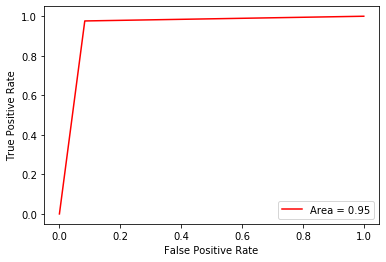

In [10]:
roc_plot(y_test,y_pred)

# ======================== Multi Layer Perceptron Model =======================

In [0]:
X, y = fetch_openml('mnist_784', return_X_y=True)

In [0]:
X /= 255
y = y.astype(int)
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=200, learning_rate_init=.1)

In [19]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
y_pred = mlp.predict(X_test)

In [21]:
print("Accuracy for the testing dataset  {:0.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("F1_Score for the testing dataset  {:0.2f}".format(f1_score(y_test, y_pred, average='macro')))

Accuracy for the testing dataset  84.92%
F1_Score for the testing dataset  0.90


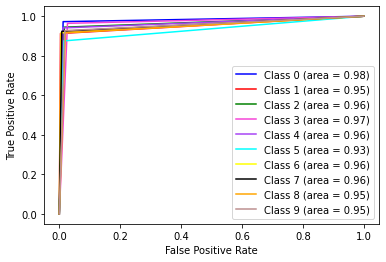

In [26]:
roc_plot_10(y_pred,y_test)